In [1]:
import pandas
from ast import literal_eval
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
import string
import re

#read the dictionary words into a Pandas dataframe
dict_df = pandas.read_csv("../data/LIWC2015-dictionaries.csv", encoding='utf-8', header=3)


lyrics_df = pandas.read_csv("../data/bbtop15-lyrics-tokenized.csv",converters={'tokens_lower':literal_eval, 'tokens_lower_clean':literal_eval } )

#drop rows where the text is missing.
lyrics_df  = lyrics_df.dropna(subset=['lyrics'])






In [3]:
## Merge the songs back for use in matrix

lyrics_df['lyrics_lower_clean'] = lyrics_df['tokens_lower_clean'].apply(lambda x: " ".join(x))
df_content = lyrics_df[['track_id','track', 'artist', 'artist_gender', 'date','year','tokens_lower_clean','lyrics_lower_clean']]
df_content

,track_id,track,artist,artist_gender,date,year,tokens_lower_clean,lyrics_lower_clean
0,0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"[whatll, we, get, for, 10, dollars, every, tin...",whatll we get for 10 dollars every ting you wa...
1,1,Bust A Move,Young M.C.,Male,1989-11-04,1989,"[bust, it, this, heres, a, jam, for, all, the,...",bust it this heres a jam for all the fellas tr...
2,2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"[well, excuse, me, take, a, few, minutes, to, ...",well excuse me take a few minutes to mellow ou...
3,3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,"[you, can, chachacha, to, this, mardis, gras, ...",you can chachacha to this mardis gras im the d...
4,4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,"[i, go, to, work, like, a, doctor, when, i, ro...",i go to work like a doctor when i rock the mic...
5,5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"[yo, wreckxneffect, in, full, effect, word, up...",yo wreckxneffect in full effect word up know w...
6,6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,"[yo, my, lone, mixer, you, ready, bust, it, lo...",yo my lone mixer you ready bust it lone mixer ...
7,7,Just A Friend,Biz Markie,Male,1989-11-04,1989,"[have, you, ever, met, a, girl, that, you, tri...",have you ever met a girl that you tried to dat...
8,8,It's Funky Enough,The D.O.C.,Male,1989-11-04,1989,"[yall, ready, for, this, rastafara, sonna, mad...",yall ready for this rastafara sonna madda fa d...
9,9,Somebody For Me,Heavy D & The Boyz,Male,1989-11-04,1989,"[oh, yeah, love, somebody, al, b, sure, harmon...",oh yeah love somebody al b sure harmonizes cho...


In [161]:
#Liwc dictionaries

dict_df

,Function,Unnamed: 1,Unnamed: 2,Unnamed: 3,Pronoun,Ppron,I,We,You,SheHe,...,Death,Informal,Unnamed: 153,Unnamed: 154,Swear,Netspeak,Unnamed: 157,Assent,Nonflu,Filler
0,a,however,so,would've,another,he,i,let's,ily*,he,...,alive,(:,fucks,sucks,af,(:,plz,absolutely,ah,anyway*
1,about,howre,somebod*,wouldn't,anybod*,he'd,i'd,lets,thee,he'd,...,assass*,(;,fucktard,tbh,arse,(;,ppl*,agree,ahh*,blah
2,above,hows,somehow,wouldnt,anymore,he's,i'd've,our,thine,he's,...,autops*,):,fucktwat*,teehe*,arsehole*,):,prob,ah,er,dunno
3,absolutely,i,someone*,wouldve,anyone*,her,i'll,ours,thou,her,...,behead*,/:,fuckwad*,tf,arses,/:,probs,aight,hm*,idk
4,abt,i'd,something*,y'all,anything,hers,i'm,ourselves,thoust,hers,...,bereave*,4ev*,fwb,tha,asf,4ev*,prolly,alright*,huh,idontknow
5,across,i'd've,somewhat,y'all's,deez,herself,i've,us,thy,herself,...,burial*,:(,fyi,thanx,ass,:(,r,aok,mm,imean
6,actually,i'll,somewhere,ya,everybod*,hes,id,we,thyself,hes,...,buried,:),geek*,thnx,asses,:),reddit*,aw,mmm*,ohwell
7,after,i'm,soon,ya'll*,everyday,him,idc,we'd,u,him,...,bury,:/,gf*,tho,asshole*,:/,retweet*,awesome,oh,rr*
8,again,i've,sooo*,yall,everyone*,himself,idgaf,we'll,ur,himself,...,casket*,;),gg,tho',asswipe,;),rite,cool,ohh*,whoa
9,against,id,specifically,yalls,everything*,his,idk,we're,y'all,his,...,casualt*,absolutely,gn,thru,badass*,abt,rofl*,duh,sigh,woah


In [3]:
## Update columns of the dictionary df

new_columns =['Function1', 'Function2', 'Function3', 'Function4', 'Pronoun', 'Ppron', 'I', 'We', 'You', 'SheHe', 'They', 'Ipron', 'Article', 'Prep', 'Auxverb', 'Adverb', 'Conj', 'Negate', 'Verb1', 'Verb2', 'Verb3', 'Verb4', 'Verb5', 'Verb6', 'Verb7', 'Adj1', 'Adj2', 'Adj3', 'Adj4', 'Adj5', 'Compare', 'Unnamed: 31', 'Unnamed: 32', 'Interrog', 'Number', 'Quant', 'Affect', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Posemo1', 'Posemo2', 'Posemo3', 'Posemo4', 'Posemo5', 'Negemo1', 'Negemo2', 'Negemo3', 'Negemo4', 'Negemo5', 'Anx', 'Anger1', 'Anger2', 'Sad', 'Social', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Family', 'Friend', 'Female', 'Male', 'CogProc', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73', 'Unnamed: 74', 'Insight1', 'Insight2', 'Cause', 'Discrep', 'Tentat', 'Unnamed: 80', 'Certain', 'Differ', 'Percent', 'Unnamed: 84', 'Unnamed: 85', 'See', 'Hear', 'Feel', 'Bio', 'Unnamed: 90', 'Unnamed: 91', 'Unnamed: 92', 'Unnamed: 93', 'Body1', 'Body2', 'Health1', 'Health2', 'Sexual', 'Ingest1', 'Ingest2', 'Drives1', 'Drives2', 'Drives3', 'Drives4', 
'Drives5', 
'Drives6', 
'Drives7', 
'Drives8', 
'Affiliation1', 
'Affiliation2', 
'Achieve1', 
'Achieve12', 
'Power1',
 'Power2', 
'Power3', 
'Power4', 
'Reward', 'Risk', 
'FocusPast', 
'Unnamed: 120',
 'Unnamed: 121', 
'FocusPresent', 
'Unnamed: 123', 
'Unnamed: 124', 
'FocusFuture', 
'Relativ', 
'Unnamed: 127', 
'Unnamed: 128', 
'Unnamed: 129', 
'Unnamed: 130', 
'Unnamed: 131', 
'Unnamed: 132', 
'Motion', 
'Unnamed: 134', 
'Unnamed: 135', 
'Space', 
'Unnamed: 137',
 'Unnamed: 138',
 'Time', 
'Unnamed: 140', 
'Work1', 
'Work2', 
'Work13', 
'Leisure1', 
'Leisure2', 
'Home', 
'Money1', 
'Money2', 
'Relig', 
'Unnamed: 150', 
'Death', 
'Informal1', 
'Informal2', 
'Informa3', 
'Swear', 
'Netspeak1', 
'Netspeak2', 
'Assent', 
'Nonflu', 
'Filler']




In [4]:
new_columns = [column.lower() for column in new_columns]

In [5]:
dict_df.columns = new_columns

### Dictionary method

In [6]:
#Function that return the dictionary that i want to investigate
def get_dict(df, label):
    df_dict =  df[lambda df: [column for column in df.columns if re.match(label + "*", column)]]
    words = []
    cols = df_dict.columns
    for col in cols:
        words += df_dict[col].tolist()
        
    ##Remove star
    return [word for word in words if str(word) != "nan"]



In [7]:
#dict_df[lambda df: [column for column in df.columns if re.match(r"function*", column)]]

money_dict = get_dict(dict_df, "money")

'coupon'

We want a total token count for each row, so we can normalize the dictionary counts. To do this we simply create a new column that contains the length of the token list in each row.

In [13]:
df_content['token_count'] = df_content['tokens_lower_clean'].apply(lambda x: len(x))
print(df_content[['tokens_lower_clean','token_count']])

                                     tokens_lower_clean  token_count
0     [whatll, we, get, for, 10, dollars, every, tin...          342
1     [bust, it, this, heres, a, jam, for, all, the,...          621
2     [well, excuse, me, take, a, few, minutes, to, ...          410
3     [you, can, chachacha, to, this, mardis, gras, ...          420
4     [i, go, to, work, like, a, doctor, when, i, ro...          695
5     [yo, wreckxneffect, in, full, effect, word, up...          361
6     [yo, my, lone, mixer, you, ready, bust, it, lo...          147
7     [have, you, ever, met, a, girl, that, you, tri...          663
8     [yall, ready, for, this, rastafara, sonna, mad...          623
9     [oh, yeah, love, somebody, al, b, sure, harmon...          339
10    [pos, now, lets, get, right, on, down, to, the...          538
11    [evil, e, and, icet, are, on, a, jack, move, l...          630
12    [samples, oh, ohhhhhh, you, got, it, the, glam...          358
13    [ladies, and, gentlemen, the

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Creating Dictionary Counts


In [9]:
def dict_count(tokens, dictionary):
    count = 0
    for token in tokens:
        for word in dictionary: 
            if word[-1] =='*':
                search_string=word[0:-1]
                if re.match(search_string, token):
                    count += 1
                    #print(token)
                    #print(word)
            else:
                if word == token:
                    count += 1
                    #print(token)
                    #print(word)
    return count
            
                

In [22]:
## Method for collecting words that are
def get_dict_words(tokens, dictionary):
    words = {}
    for token in tokens:
        for word in dictionary: 
            if word[-1] =='*':
                search_string=word[0:-1]
                if re.match(search_string, token):
                    if word in words:
                        words[word] += 1
                    else:
                        words[word] = 1
                    
                    #print(token)
                    #print(word)
            else:
                if word == token:
                    if word in words:
                        words[word] += 1
                    else:
                        words[word] = 1
                    #print(token)
                    #print(word)
    return words
    

In [11]:
test_get_dict = get_dict_words(df_content['tokens_lower_clean'][2120], money_dict)
print(test_get_dict)

{'dollar*': 8, 'trade*': 1, 'money*': 1, 'bought': 1, 'rich': 1}


## Dictionary Method using Scikit-learn
We can also do this using the document term matrix. We'll again do this in pandas, to make it conceptually clear. As you get more comfortable with programming you may want to eventually shift over to working with sparse matrix format.

In [4]:
#import the function CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

#create our document term matrix as a pandas dataframe
dtm_df = pandas.DataFrame(countvec.fit_transform(df_content.lyrics_lower_clean).toarray(), columns=countvec.get_feature_names(), index = df_content.index)
dtm_df

,000,007,007better,01,02,03,04,05,06,06er,...,어디,어서,없다,에라,예뻐,예쁘면,오늘의,있으,째라,찾겠어
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#create a columns variable that is a list of all column names
columns = list(dtm_df)
columns

['000',
 '007',
 '007better',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '06er',
 '07',
 '09',
 '0e',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10019',
 '1005th11',
 '100g',
 '100k',
 '100s',
 '101',
 '1017s',
 '102',
 '1024',
 '103',
 '10304',
 '104',
 '105',
 '106',
 '1079',
 '108',
 '109',
 '1099s',
 '10k',
 '10ll',
 '10man',
 '10s',
 '10th',
 '11',
 '110',
 '1100',
 '1112084',
 '112',
 '1133',
 '114th',
 '1167',
 '118',
 '118th',
 '119th',
 '11s',
 '11th',
 '12',
 '1200',
 '1207',
 '123',
 '1234',
 '123456',
 '1245',
 '125',
 '125th',
 '12am',
 '12gauge',
 '12inch',
 '12pack',
 '12pm',
 '12s',
 '12shot',
 '12steps',
 '12th',
 '12x',
 '12yearolds',
 '12yearsold',
 '13',
 '130',
 '132271',
 '135',
 '1365',
 '139',
 '13extraterrestrial',
 '13th',
 '14',
 '140',
 '143',
 '143rd',
 '144',
 '145',
 '14th',
 '15',
 '150',
 '1500',
 '150inch',
 '151',
 '155',
 '1555',
 '15s',
 '15th',
 '15x',
 '16',
 '160',
 '165',
 '16s',
 '16th',
 '16x',
 '17',
 '170',
 '1718',
 '1738',
 '175',
 '17

In [10]:
# Method for extracting realvenat columns
def get_dict_cols(cols, dictionary):
    words = []
    for col in cols:
        for word in dictionary: 
            if word[-1] =='*':
                search_string=word[0:-1]
                if re.match(search_string, col):
                    words.append(col)
            else:
                if word == col:
                    words.append(col)
                    #print(token)
                    #print(word)
    return words
    

In [15]:
## COlumsn related to dict
money_columns = get_dict_cols(columns, money_dict)

In [16]:
#Slice out the relevant columns
dtm_money = dtm_df[money_columns]
dtm_money['money_count'] = dtm_money.sum(axis=1)

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [23]:
def get_dict_words_year(dtm, cols, year):
    words = {}
    dtm_year = dtm[dtm['year'] == year]
    ##Get columns counts
    for col in cols:
        count = dtm_year[col].sum()
        if count > 0: 
            words[col] = count
    
    return words

In [266]:
dtm_money

,track,artist,artist_gender,date,year,token_count,account,accountable,accountant,accountants,...,visa,visas,wage,wages,wealth,wealthy,worth,yen,money_count,money_ratio
0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,342,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.005848
1,Bust A Move,Young M.C.,Male,1989-11-04,1989,621,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.003221
2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,410,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0.009756
3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,420,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.002381
4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,695,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.002878
5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,361,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
7,Just A Friend,Biz Markie,Male,1989-11-04,1989,663,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.001508
8,It's Funky Enough,The D.O.C.,Male,1989-11-04,1989,623,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0.004815
9,Somebody For Me,Heavy D & The Boyz,Male,1989-11-04,1989,339,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.002950


In [18]:
df_meta = df_content[['track_id','track', 'artist', 'artist_gender', 'date','year','token_count']]
dtm_money = df_meta.join(dtm_money)


In [19]:
dtm_money['money_ratio'] = dtm_money['money_count'] / dtm_money['token_count']

In [20]:
groupedby_year = dtm_money.groupby('year')

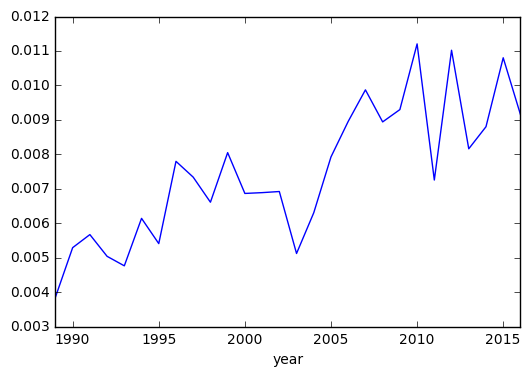

In [21]:
groupedby_year['money_ratio'].mean().plot(kind='line')
plt.show()

## Love. 

In [6]:
love_dict = ['love', 'heart', 'blessing', 'babe', 'baby', 'heaven', 'family', 'caring', 'happiness', 'forever', 'happy', 'trust', 'passion', 'romance', 'sweet', 'kiss', 'love', 'hugs', 'warm' , 'fun', 'joy', 'friendship', 'marriage', 'chocolate', 'husband', 'wife', 'forever', 'caring']

In [11]:
## Columns related to dict
love_columns = get_dict_cols(columns, love_dict)

In [12]:
#Slice out the relevant columns
dtm_love = dtm_df[love_columns]
dtm_love['love_count'] = dtm_love.sum(axis=1)

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
df_meta = df_content[['track_id','track', 'artist', 'artist_gender', 'date','year','token_count']]
dtm_love = df_meta.join(dtm_love)



In [15]:
dtm_love['love_ratio'] = dtm_love['love_count'] / dtm_love['token_count']

In [16]:
groupedby_year = dtm_love.groupby('year')

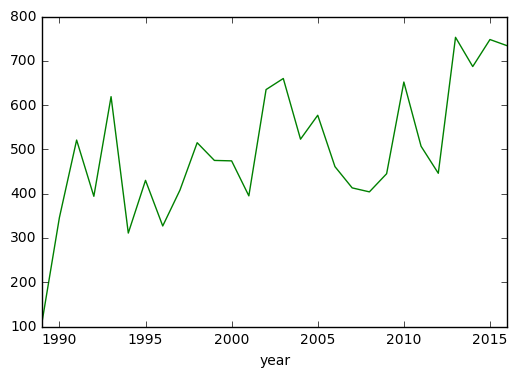

In [21]:
groupedby_year['love_count'].sum().plot(kind='line', color="green")
plt.savefig('love_count_cumulative.png')
plt.show()


In [24]:
love_words_2010 = get_dict_words_year(dtm_love, love_columns, 2010)
print(love_words_2010)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [24]:
## Plot a histogram of the money realted words in year 2000
money_words_2013 = get_dict_words_year(dtm_money,money_columns, 2013)
print(money_words_2013)
#plt.bar(list(money_words_2000.keys()), list(money_words_2000.values()), color='g')
#plt.show()

{'bucks': 3, 'moneys': 2, 'payback': 1, 'lottery': 2, 'bet': 9, 'sell': 10, 'greedy': 1, 'cost': 6, 'financial': 2, 'dollar': 47, 'shopping': 2, 'rich': 40, 'paid': 16, 'credit': 2, 'visas': 1, 'debit': 1, 'worth': 9, 'bill': 8, 'bills': 5, 'fund': 2, 'accounts': 1, 'rent': 1, 'paying': 3, 'irs': 1, 'nickels': 1, 'bankhead': 2, 'merchant': 2, 'sold': 5, 'profit': 1, 'buy': 18, 'price': 1, 'bought': 6, 'buyin': 2, 'rented': 1, 'owe': 2, 'riches': 3, 'euros': 2, 'expensive': 2, 'donate': 1, 'spent': 7, 'pay': 9, 'insurance': 2, 'cash': 20, 'tuition': 1, 'spending': 1, 'penny': 3, 'shop': 1, 'loan': 2, 'salary': 1, 'greed': 1, 'richer': 1, 'borrow': 1, 'paystubs': 1, 'rents': 1, 'dimes': 3, 'account': 3, 'poor': 1, 'treasures': 1, 'taxing': 1, 'buck': 1, 'beggars': 1, 'business': 6, 'dime': 2, 'cashing': 1, 'bank': 9, 'store': 6, 'spend': 4, 'shoppin': 1, 'auction': 1, 'free': 11, 'money': 101, 'cheap': 1, 'trade': 5, 'payment': 1, 'dollars': 8, 'banks': 1, 'selling': 3, 'accountants': 1,

In [34]:
power_dict = get_dict(dict_df, "power")
power_columns = get_dict_cols(columns, power_dict)

In [35]:
dtm_power = dtm_df[power_columns]
dtm_power = df_meta.join(dtm_power)


#dtm_power['power_count'] = dtm_power.sum(axis=1)

In [36]:
power_words_2013 = get_dict_words_year(dtm_power,power_columns, 2013)
print(power_words_2013)

{'vip': 2, 'students': 2, 'top': 31, 'ambition': 2, 'powerful': 1, 'biggest': 1, 'famous': 6, 'deans': 3, 'strongest': 1, 'greedy': 1, 'winner': 6, 'dishonor': 1, 'respect': 2, 'supervision': 1, 'glory': 1, 'lawyer': 1, 'official': 2, 'war': 6, 'lead': 3, 'cops': 6, 'victim': 1, 'rules': 5, 'mastered': 1, 'pity': 2, 'missus': 1, 'below': 1, 'lawless': 1, 'passive': 1, 'bossed': 1, 'huge': 1, 'fame': 12, 'rebel': 2, 'upper': 1, 'mr': 9, 'above': 2, 'controlla': 1, 'deny': 4, 'forces': 1, 'dummy': 1, 'destroy': 2, 'rich': 40, 'manager': 1, 'police': 4, 'disgrace': 1, 'over': 40, 'struggle': 5, 'struggled': 1, 'battle': 13, 'king': 22, 'big': 40, 'bottom': 38, 'submissive': 1, 'control': 4, 'executive': 1, 'richer': 1, 'teen': 1, 'weak': 4, 'vp': 1, 'ms': 2, 'doctor': 3, 'strong': 9, 'queen': 2, 'riches': 3, 'ceo': 4, 'higher': 1, 'followers': 2, 'god': 41, 'bully': 1, 'criminals': 1, 'bigger': 3, 'enormous': 3, 'win': 4, 'large': 1, 'help': 20, 'cop': 9, 'champagne': 9, 'leader': 2, 'fai

# Anger 

In [256]:
anger_dict = get_dict(dict_df, "anger")

In [257]:
anger_columns = get_dict_cols(columns, anger_dict)

In [258]:
#Slice out the relevant columns
dtm_anger = dtm_df[anger_columns]
dtm_anger['money_count'] = dtm_anger.sum(axis=1)

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [264]:
dtm_anger = df_meta.join(dtm_money)


ValueError: columns overlap but no suffix specified: Index(['track', 'artist', 'artist_gender', 'date', 'year', 'token_count'], dtype='object')

# Informal

# Leisure	

# Money in hip hop over timer

In [153]:
lyrics_df['money_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, money_dict))

In [156]:
df_content['money_ratio'] = df_content['money_count'] / lyrics_df['token_count']

In [ ]:
df_content['money_words'] = df_content['tokens_lower_clean'].apply(lambda x: get_dict_words(x, money_dict))

In [157]:
groupedby_year = df_content.groupby('year')

KeyError: "['money_ratio'] not in index"

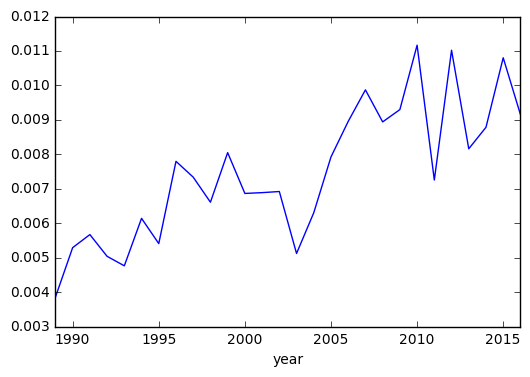

In [158]:
groupedby_year['money_ratio'].mean().plot(kind='line')
plt.show()

In [159]:
print(lyrics_df[['track','artist', 'artist_gender', 'money_ratio']].sort_values(by=['money_ratio'], ascending=False))

                                 track  \
1511                       I Get Money   
1652                      Plenty Money   
1733                     Break My Bank   
1883                       Born Stunna   
620                          Get Money   
1346                 Can't Satisfy Her   
1317                 Knuck If You Buck   
2263                         M.I.L.F.$   
885                      Watch Out Now   
2124                             Bills   
493                       Buck Em Down   
1605                        Arab Money   
146          Bitch Betta Have My Money   
867        Money Cash Hoes/Jigga What?   
1516                       Coffee Shop   
1766                        Fire Flame   
429                Money In The Ghetto   
1941                            Tapout   
1679                     Money To Blow   
2177                        RGF Island   
2147                  This Could Be Us   
1157                      Ching, Ching   
1699               Million Dollar 

# Sex in Rap 1989-2016 

In [136]:
sex_dict = get_dict(dict_df, "sexual")

In [138]:
lyrics_df['sex_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, sex_dict))

In [139]:
lyrics_df['sex_ratio'] = lyrics_df['sex_count'] / lyrics_df['token_count']

In [140]:
groupedby_year = lyrics_df.groupby('year')

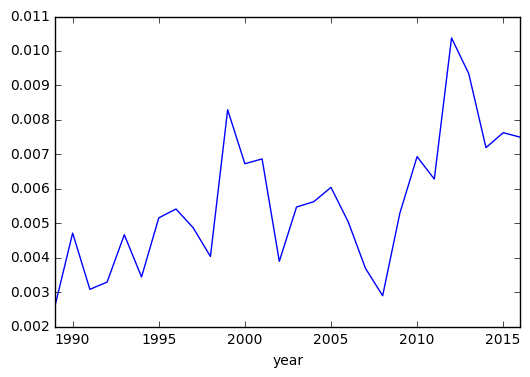

In [141]:
groupedby_year['sex_ratio'].mean().plot(kind='line')
plt.show()

# Power in Rap 1989-2016

In [143]:
power_dict = get_dict(dict_df, "power")

In [145]:
lyrics_df['power_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, power_dict))

In [146]:
lyrics_df['power_ratio'] = lyrics_df['power_count'] / lyrics_df['token_count']

In [147]:
groupedby_year = lyrics_df.groupby('year')

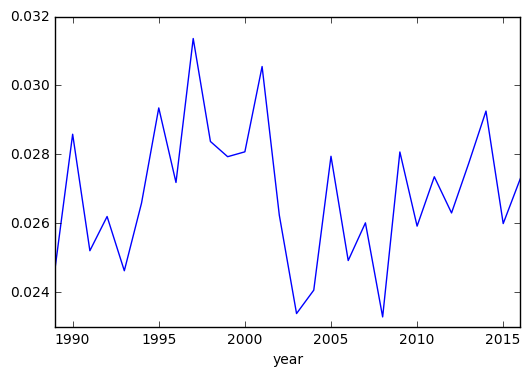

In [149]:
groupedby_year['power_ratio'].mean().plot(kind='line')
plt.show()

In [155]:
print(lyrics_df[['track','artist', 'artist_gender', 'power_ratio']].sort_values(by=['power_ratio'], ascending=False))

                                       track  \
58                                   Fame 90   
334                       Down With The King   
2017                             We Dem Boyz   
2006                      Turn Down For What   
1140                              Good Times   
1367                               Your Body   
2045                                Hangover   
2201                    Bottom Of The Bottle   
1686                                 How Low   
1705                         All I Do Is Win   
2002                                 V. 3005   
1085                               Think Big   
2208                                Low Life   
1752                              Beat It Up   
1037                          Get Crunked Up   
2207                                Might Be   
2224                                     Law   
1460                                Top Back   
1361                           Pon de Replay   
1969                           Helluva N

# Negative emotions in hip hop over time 